# Improved Bellman-Ford algorithm with Maximum Violation Permutation problem

## Authors: LUONG Ethan, PHAM Louis-Antoine

This project aims to improve Bellman-Ford algorithm's running times by using a specific order to traverse the vertices of a given graph.

In order to determine the said order, we use a greedy algorithm that successively seeks the sources, the targets, and the vertice with the largest gap in number between its successors and its ancestors, while there is still a node to study.

In [148]:
from Graph import Graph
from utils import generate_random_test_set
import networkx as nx
import random

%load_ext autoreload
%autoreload 2

random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Bellman-Ford Algorithm

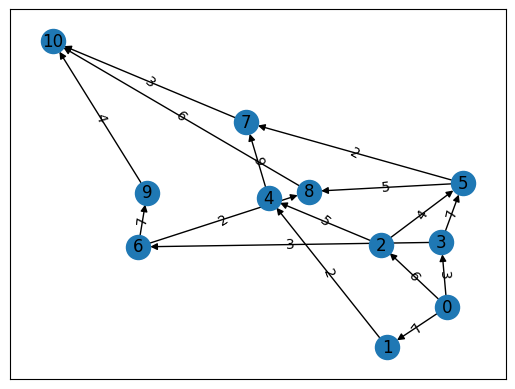

In [149]:
nodes = range(0, 11)
edges = [(0,1,{'weight':7}), (0,2,{'weight':6}), (0,3,{'weight':3}), (1,4,{'weight':2}), (2,4,{'weight':5}), (2,5,{'weight':4}), (3,5,{'weight':7}), (3,6,{'weight':3}), (4,7,{'weight':9}), (5,7,{'weight':2}), (5,8,{'weight':5}), (6,8,{'weight':2}), (6,9,{'weight':7}), (7,10,{'weight':3}), (8,10,{'weight':6}), (9,10,{'weight':4})]
G1 = Graph(nodes, edges)
G1.display()

Number of iterations: 2


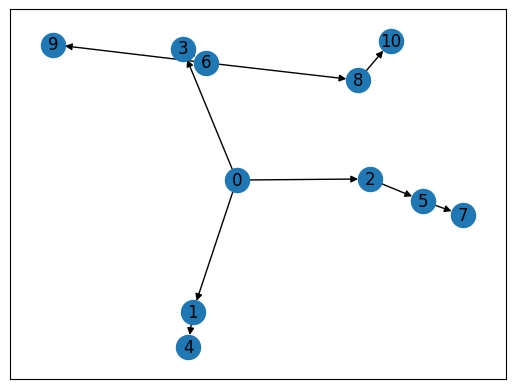

In [150]:
shortest_paths_graph, n_iterations = G1.compute_shortest_paths(0)
print(f'Number of iterations: {n_iterations}')
shortest_paths_graph.display()

### 2. Greedy Algorithm: GloutonFas

In [151]:
print(f'Order: {shortest_paths_graph.glouton_fas()}')

Order: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Order: [4, 6, 5, 8, 7, 1, 2, 3]


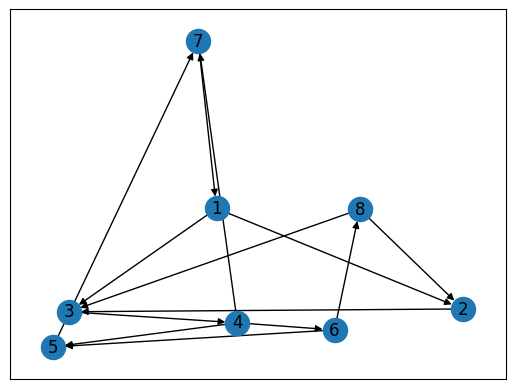

In [152]:
G2 = Graph(range(1,9), [(1,2), (1,3), (2,3), (3,4), (4,5), (4,6), (4,7), (5,7), (6,5), (6,8), (7,1), (8,2), (8,3)])
G2.display()
print(f'Order: {G2.glouton_fas()}')

### 3. Tests of the Greedy Algorithm on Random Graphs

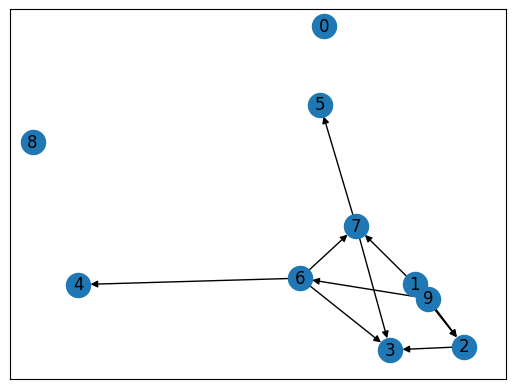

In [153]:
G, weighted_graphs = generate_random_test_set(n_instances=4, n_nodes=10, weight_min=-10, weight_max=10)
G.display()

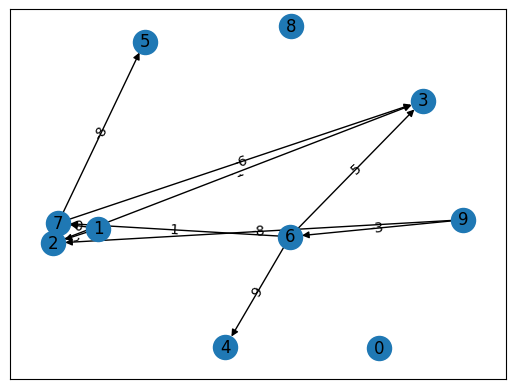

In [154]:
H = weighted_graphs[-1]
H.display()

Source: 6


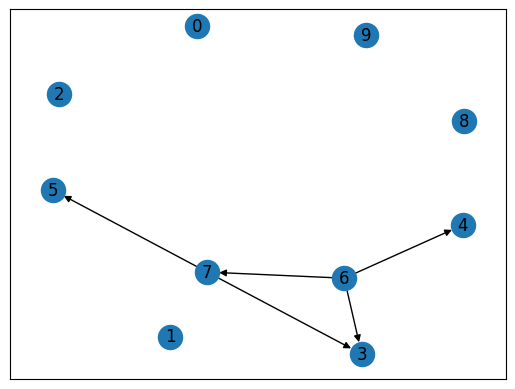

In [155]:
s = G.choose_source()
print(f'Source: {s}')
shortest_paths = [graph.compute_shortest_paths(s)[0] for graph in weighted_graphs[:-1]]
T = Graph.union(shortest_paths)
T.display()